In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [15]:
# leer csv
df = pd.read_csv('tmp/sentimentdataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [16]:
# eliminar columnas 
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hour'], inplace=True)
df.head(10)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17


In [17]:
# eliminar filas con valores faltantes

df.dropna(axis=0, how='any', inplace=True)
df.head(10)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17


In [18]:
# renombrar las columnas 
renombrado = {
    'Text': 'comentario',
    'Sentiment' : 'sentimiento',
    'Timestamp': 'fecha',
    'User' : 'usuario',
    'Platform' : 'plataforma',
    'Hashtags' : 'hashtags',
    'Retweets' : 'retweets',
    'Likes' : 'likes',
    'Country' : 'pais',
    'Year' : 'año',
    'Month' : 'mes',
    'Day' : 'dia'
}

df.rename(columns=renombrado, inplace=True)
df.head(10)

,comentario,sentimiento,fecha,usuario,plataforma,hashtags,retweets,likes,pais,año,mes,dia
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17


In [19]:
# Calcula media, mediana y desviacion estandar 
print("Media de likes: ", df['likes'].mean())
print("Mediana de likes: ", df['likes'].median())
print("Desviación estándar de retweets: ", df['retweets'].std())

Media de likes:  42.90163934426229
Mediana de likes:  43.0
Desviación estándar de retweets:  7.061286414470444


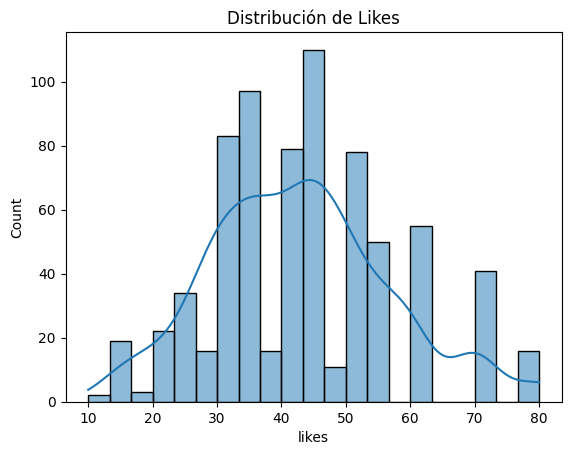

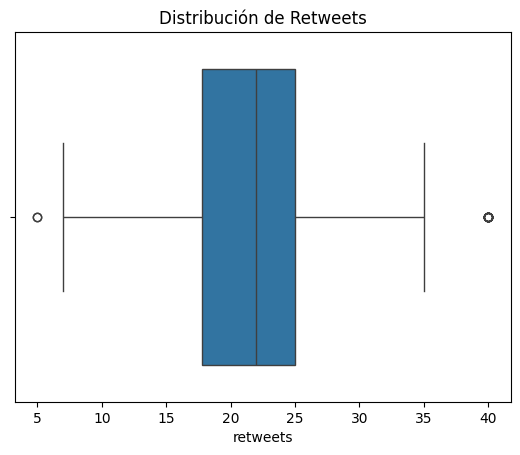

In [20]:
# Histograma de likes
sns.histplot(df['likes'], kde=True)
plt.title('Distribución de Likes')
plt.show()

# Boxplot de retweets
sns.boxplot(x=df['retweets'])
plt.title('Distribución de Retweets')
plt.show()

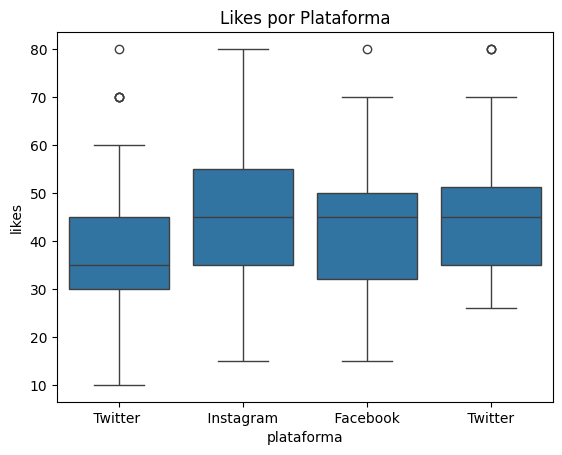

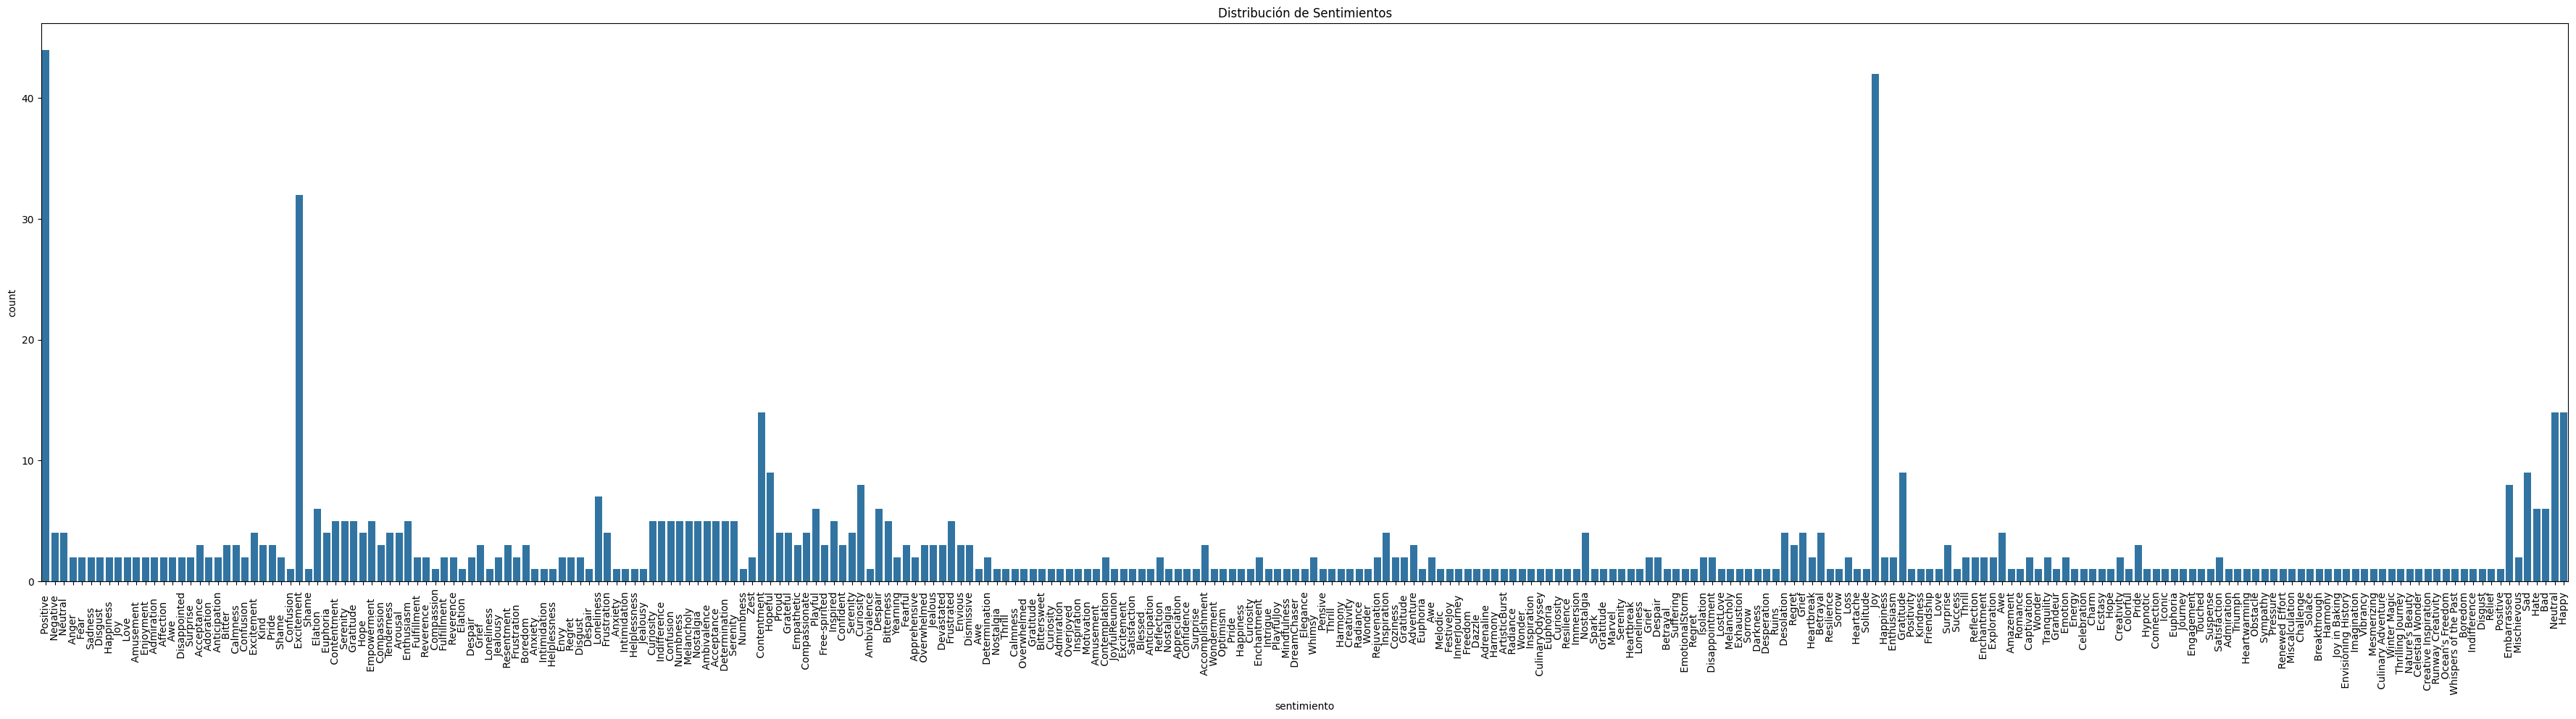

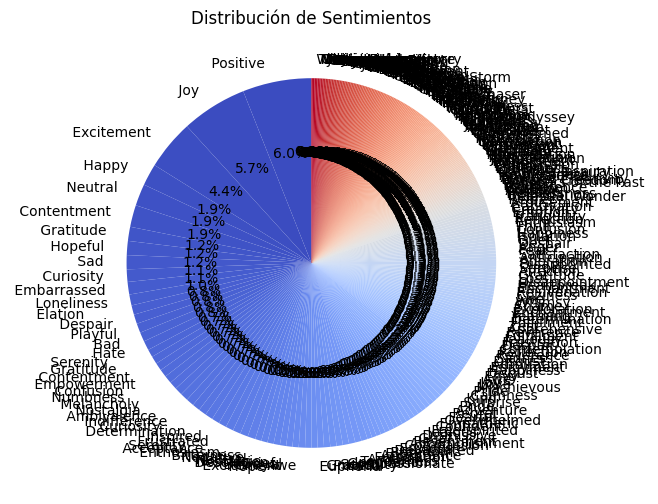

In [21]:
# Boxplot de likes por plataforma
sns.boxplot(x='plataforma', y='likes', data=df)
plt.title('Likes por Plataforma')
plt.show()

# Conteo de sentimientos
plt.figure(figsize=(45,10))
sns.countplot(x='sentimiento', data=df)
plt.title('Distribución de Sentimientos')
plt.xticks(rotation=90)
plt.show()

# Pie plot
plt.figure(figsize=(10, 6))
df['sentimiento'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')

plt.title('Distribución de Sentimientos')
plt.ylabel('') 
plt.show()


In [22]:
# Correlación entre retweets y likes
print("Correlación entre Retweets y Likes: ", df[['retweets', 'likes']].corr())

# Regresión lineal simple
X = df[['retweets']]
y = df['likes']
reg = LinearRegression().fit(X, y)

# Predicción de likes basada en retweets
print("Coeficiente de regresión: ", reg.coef_)
print("Intercepto: ", reg.intercept_)

Correlación entre Retweets y Likes:            retweets     likes
retweets  1.000000  0.998482
likes     0.998482  1.000000
Coeficiente de regresión:  [1.99233691]
Intercepto:  0.05006508091711481


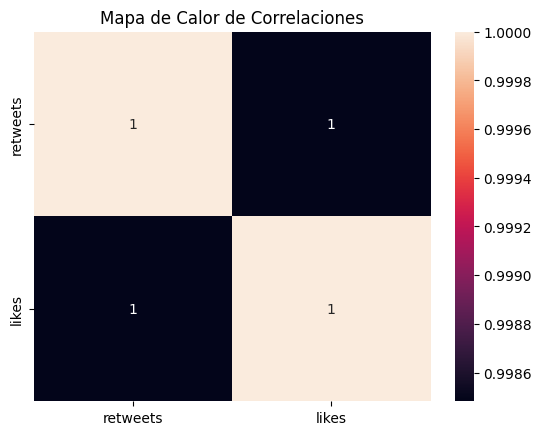

In [12]:
# Mapa de calor de correlaciones
corr = df[['retweets', 'likes']].corr()
sns.heatmap(corr, annot=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

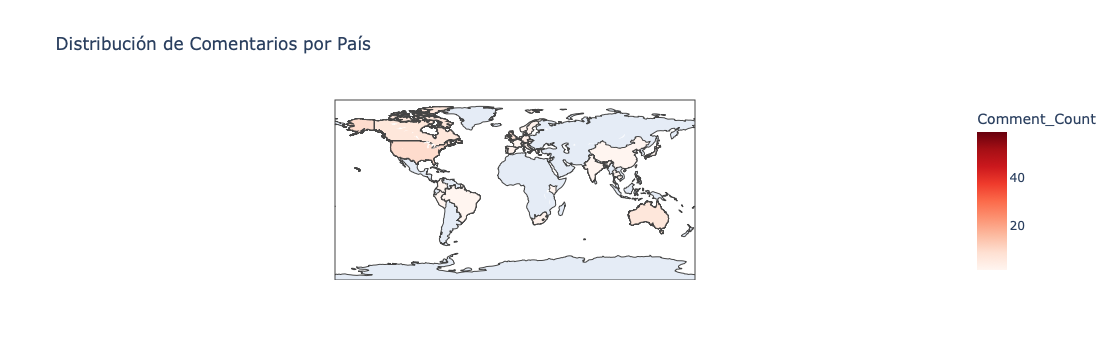

In [23]:
# Agrupar por país para obtener el número de comentarios o algún valor por país
comentarios_por_pais = df.groupby('pais')['sentimiento'].count().reset_index()
comentarios_por_pais.columns = ['Country', 'Comment_Count']

# Crear el mapa de coropletas
fig = px.choropleth(
    comentarios_por_pais,
    locations='Country',  # Columna de países
    locationmode='country names',  # Usa nombres de países
    color='Comment_Count',  # Columna con los valores (número de comentarios)
    hover_name='Country',  # Lo que aparecerá al pasar el cursor
    color_continuous_scale='Reds',  # Escala de colores
    title='Distribución de Comentarios por País'  # Título del gráfico
)

# Mostrar el gráfico
fig.show()